<a href="https://colab.research.google.com/github/Patcharaporn2093/Data-Driven-Customer-Relationship-Management/blob/main/Case_study_Teamlab_Shanghai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [1]:
!gdown 148_nEG-eqYiJrJIMQ5skGbSMoqgnaNrj

Downloading...
From: https://drive.google.com/uc?id=148_nEG-eqYiJrJIMQ5skGbSMoqgnaNrj
To: /content/Shan (1).xlsx
100% 80.9k/80.9k [00:00<00:00, 63.7MB/s]


In [2]:
!pip install wordcloud
!pip install nltk
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = pd.read_excel('/content/Shan (1).xlsx')
data

,web-scraper-order,web-scraper-start-url,Name,Comment,Date,Rate
0,1709488452-1,https://www.trip.com/travel-guide/attraction/s...,Anonymous User,This is a dream world created by light and sha...,"Feb 1, 2024",5
1,1709488452-2,https://www.trip.com/travel-guide/attraction/s...,紫菜铲铲子,"After the peak period, the traffic is not larg...","Jan 16, 2024",4
2,1709488452-3,https://www.trip.com/travel-guide/attraction/s...,nhungvu,Just one word for this place: Awesome!!! It’s ...,"Jan 15, 2024",5
3,1709488452-4,https://www.trip.com/travel-guide/attraction/s...,016***97,"Wonderful light and shadow world, dazzling col...","Jan 13, 2024",5
4,1709488452-5,https://www.trip.com/travel-guide/attraction/s...,BLUEEYES2,"Immerse in the flow of light and shadow, the m...","Mar 1, 2024",5
...,...,...,...,...,...,...
494,NaN,NaN,NaN,An amazing use of technology to create art. It...,2023-12-01 00:00:00,5
495,NaN,NaN,NaN,There are so many beautiful out of this world ...,2023-12-01 00:00:00,5
496,NaN,NaN,NaN,I was a bit disappointed to be honest. The vid...,2023-11-01 00:00:00,5
497,NaN,NaN,NaN,Experience is interesting with kids. You can m...,2023-05-01 00:00:00,5


# Sentiment analysis

In [4]:
import nltk
nltk.download('vader_lexicon')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Lowercasing
    text = text.lower()
    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Removing special characters and punctuation
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization (optional)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Joining back into a string
    text = ' '.join(tokens)
    return text

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Clean the text and apply sentiment analysis
data['cleaned_content'] = data['Comment'].apply(clean_text)
data['sentiment'] = data['cleaned_content'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment_category'] = data['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Display the updated DataFrame with cleaned content, sentiment scores, and categories
data[['Comment', 'cleaned_content', 'sentiment', 'sentiment_category']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Comment,cleaned_content,sentiment,sentiment_category
0,This is a dream world created by light and sha...,dream world created light shadow sea flower bu...,0.7964,positive
1,"After the peak period, the traffic is not larg...",peak period traffic large suitable walking bab...,0.5435,positive
2,Just one word for this place: Awesome!!! It’s ...,one word place awesome deserved visit u shangh...,0.7841,positive
3,"Wonderful light and shadow world, dazzling col...",wonderful light shadow world dazzling color be...,0.9231,positive
4,"Immerse in the flow of light and shadow, the m...",immerse flow light shadow music moving quiet t...,-0.2716,negative


In [5]:
def determine_sentiment(rate):
    if rate > 3:
        return 'positive'
    elif rate == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the 'rate' column to create the 'true_sentiment' column
data['true_sentiment'] = data['Rate'].apply(determine_sentiment)
data.head(5)

,web-scraper-order,web-scraper-start-url,Name,Comment,Date,Rate,cleaned_content,sentiment,sentiment_category,true_sentiment
0,1709488452-1,https://www.trip.com/travel-guide/attraction/s...,Anonymous User,This is a dream world created by light and sha...,"Feb 1, 2024",5,dream world created light shadow sea flower bu...,0.7964,positive,positive
1,1709488452-2,https://www.trip.com/travel-guide/attraction/s...,紫菜铲铲子,"After the peak period, the traffic is not larg...","Jan 16, 2024",4,peak period traffic large suitable walking bab...,0.5435,positive,positive
2,1709488452-3,https://www.trip.com/travel-guide/attraction/s...,nhungvu,Just one word for this place: Awesome!!! It’s ...,"Jan 15, 2024",5,one word place awesome deserved visit u shangh...,0.7841,positive,positive
3,1709488452-4,https://www.trip.com/travel-guide/attraction/s...,016***97,"Wonderful light and shadow world, dazzling col...","Jan 13, 2024",5,wonderful light shadow world dazzling color be...,0.9231,positive,positive
4,1709488452-5,https://www.trip.com/travel-guide/attraction/s...,BLUEEYES2,"Immerse in the flow of light and shadow, the m...","Mar 1, 2024",5,immerse flow light shadow music moving quiet t...,-0.2716,negative,positive


<ipython-input-6-a9f32de498e5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='sentiment_category', order=['positive', 'neutral', 'negative'], palette='viridis')


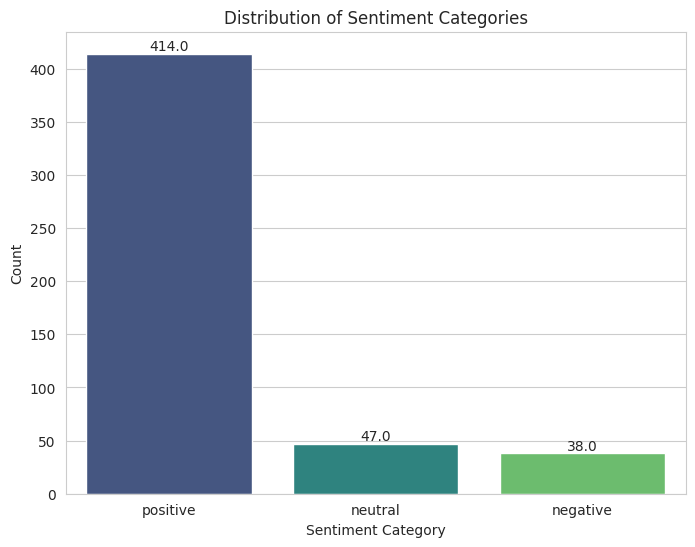

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a count plot for the 'sentiment_category' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='sentiment_category', order=['positive', 'neutral', 'negative'], palette='viridis')

# Add title and labels to the plot
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Adding numeric labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

# Show the plot
plt.show()

## Positive Comment

In [7]:
positive_comments = data[data['sentiment_category'] == 'positive']['Comment']
positive_comments_full_sentence = positive_comments.tolist()

# Printing the full comments
for comment in positive_comments_full_sentence:
    print(comment)

This is a dream world created by light and shadow, there are seas of flowers, butterflies, and dolls... The most fun thing is that you can interact with light and shadow, such as where you go, the flowers on the ground will bloom, and the flowers will wither when you touch the wall. There is also a cafe inside, you can take a break after playing.
After the peak period, the traffic is not large, it is very suitable for walking the baby, you can play slowly and experience it slowly. But the top floor restaurant is not worth going, there are few choices, the environment is average, and the price is not high. The two hot drinks sent by the package are only coffee and black tea. The children can't drink it at all, which is about not sending it. It is recommended to have lunch and go again, about 2 hours of tour.
Just one word for this place: Awesome!!! It’s deserved to visit when u are in Shanghai. Highly recommend!!!
Wonderful light and shadow world, dazzling colors and beautiful lighting 

## Negative Comment

In [8]:
negative_comments = data[data['sentiment_category'] == 'negative']['Comment']
negative_comments_full_sentence = negative_comments.tolist()

# Printing the full comments
for comment in negative_comments_full_sentence:
    print(comment)

Immerse in the flow of light and shadow, the music is moving and quiet, and time passes and completely empty.
Very shocking, feel high-tech
Not bad! Really
It's a worthwhile trip, it's really shocking
I thought it was just one floor but i was totally wrong. Make sure you explore every area!
The net red punch card is just foreigners have to go to stop it, Yuer is expensive and can't invoice
Take the children to Shanghai to travel, feel the literary atmosphere of Shanghai, although the fare is small, but it feels very shocking, it is worth seeing.
Really shocking, the light and shadow effect is not out of the right in China
Take the baby, Bao is very excited, projection technology color collision! There is a sense of shock! But Bao Ma should pay attention to the fact that the baby liquid can not be brought inside. The child has to deal with drinking water when he is thirsty. It will be a bit tired after a long time, and there is no place to sit! There is a coffee shop after coming out! C

In [9]:
data_count_rate = data['Rate'].value_counts().sort_values(ascending=False)
data_count_rate

Rate
5    419
4     53
3     13
1      7
2      7
Name: count, dtype: int64

# Count Rating

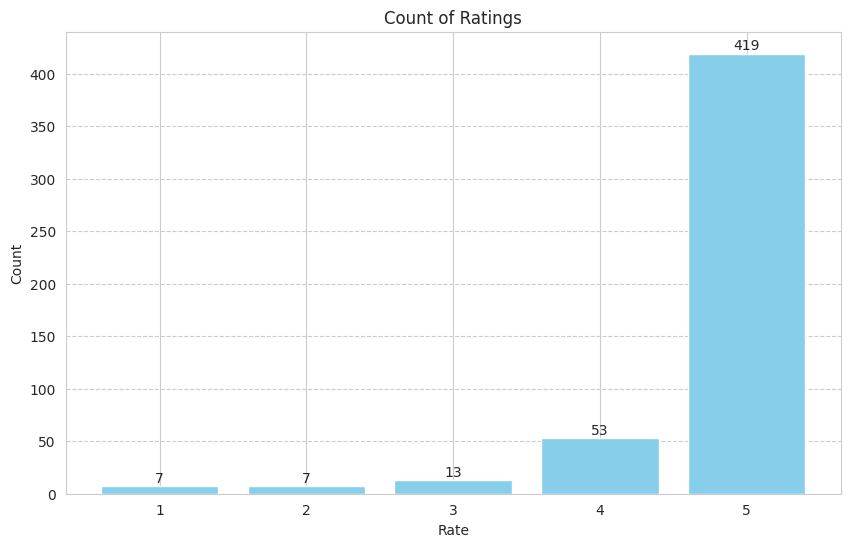

In [10]:
data_count_rate = data['Rate'].value_counts().sort_values(ascending=False)

# Plotting the bar graph with numeric labels on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(data_count_rate.index, data_count_rate.values, color='skyblue')

# Adding numeric labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.title('Count of Ratings')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for readability
plt.grid(axis='y', linestyle='--')

plt.show()


# STOPWORDS

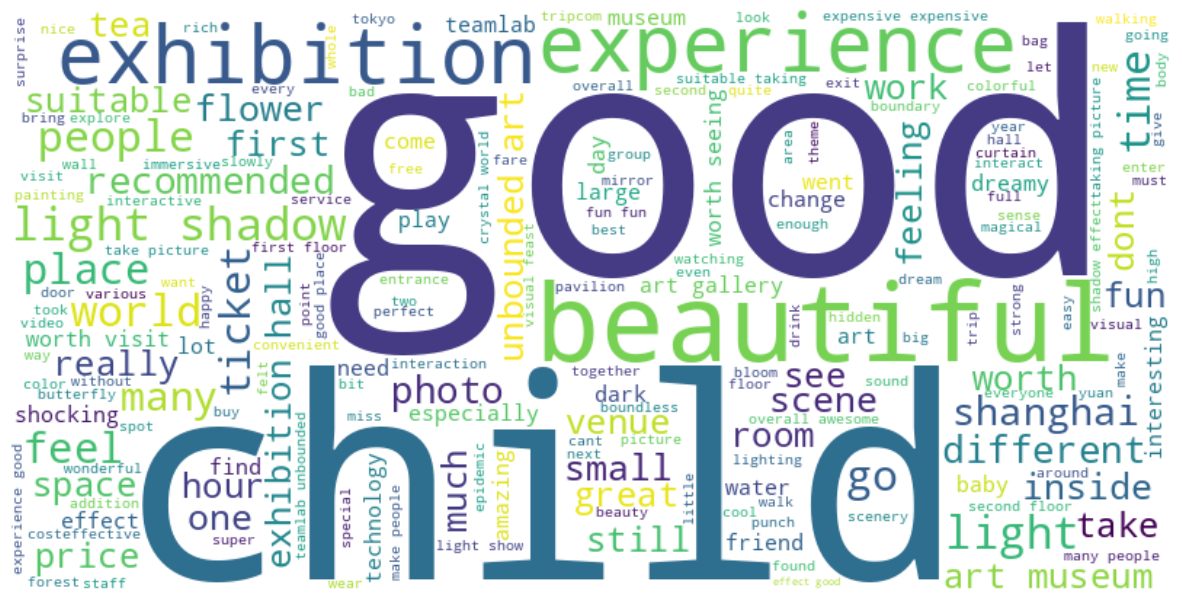

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all cleaned_content texts into a single string
text = " ".join(review for review in data.cleaned_content.dropna())

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


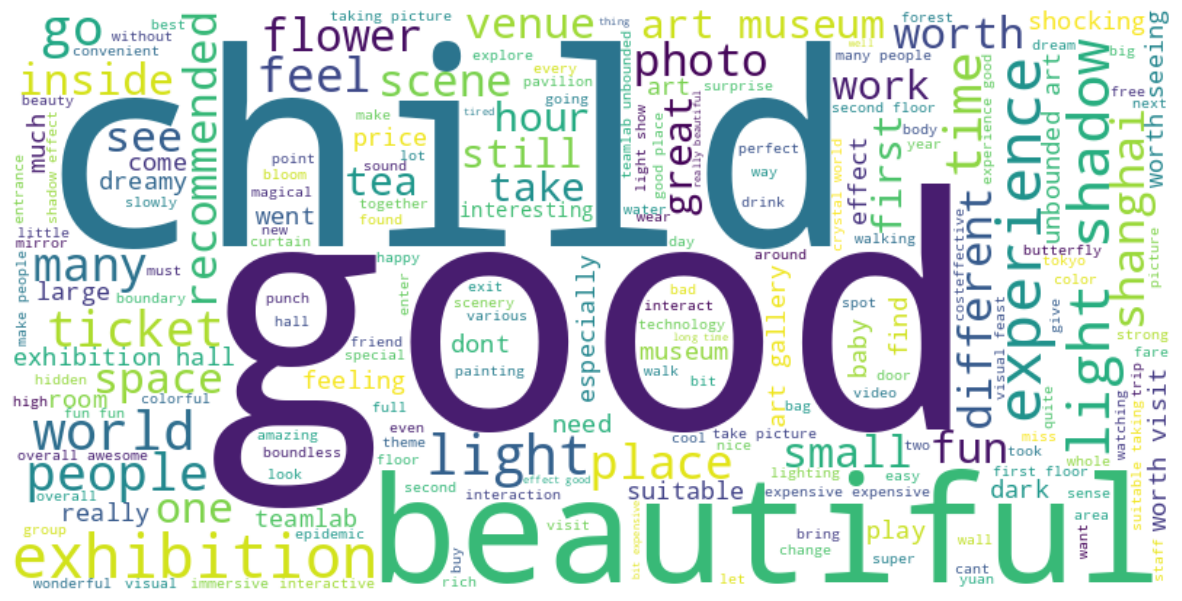

In [12]:
#Filter rate 4-5

data_high = data[(data['Rate'] == 5) | (data['Rate'] == 4)]
text = " ".join(content for content in data_high['cleaned_content'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

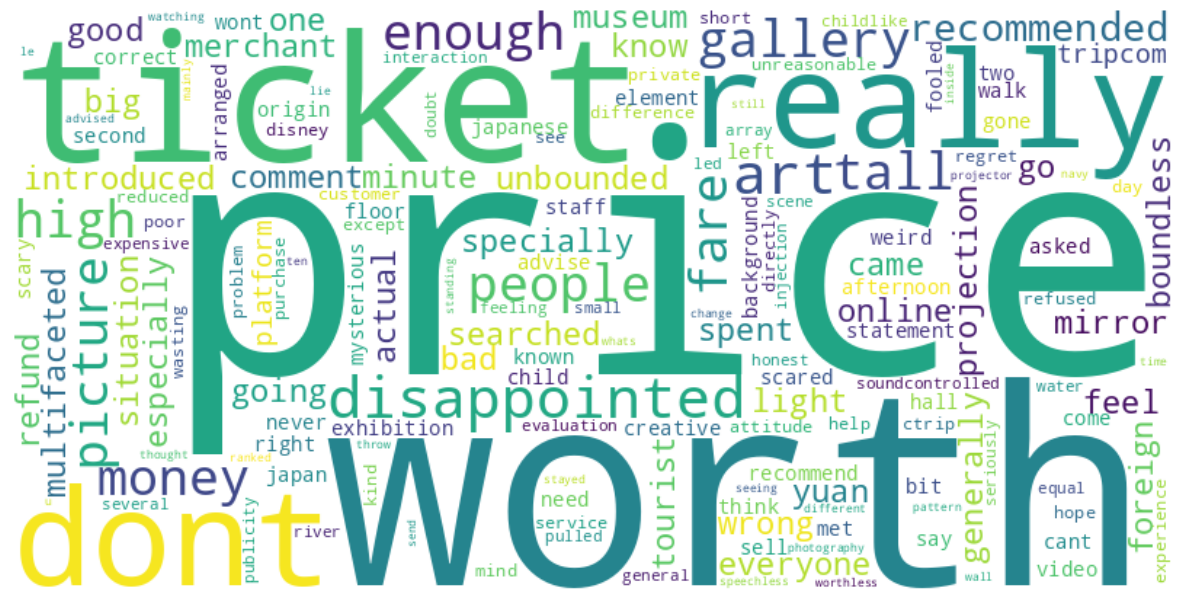

In [13]:
#Filter rate 1-2

data_lower = data[(data['Rate'] == 1) | (data['Rate'] == 2)]
text = " ".join(content for content in data_lower['cleaned_content'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

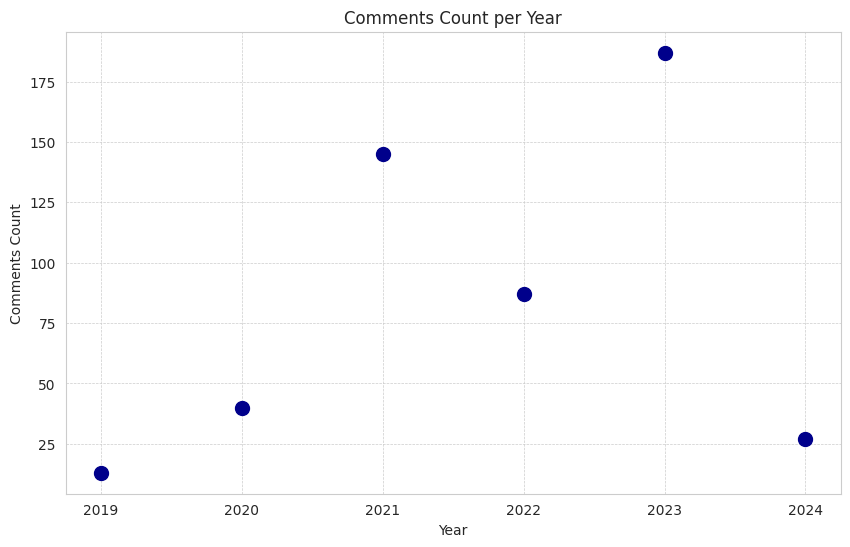

In [14]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract year from 'Date' column again after ensuring it's in datetime format
data['Year'] = data['Date'].dt.year

# Count occurrences of each year
yearly_comment_counts = data['Year'].value_counts().sort_index()

yearly_comment_counts

# Plotting the scatter plot for comment counts per year
plt.figure(figsize=(10, 6))
plt.scatter(yearly_comment_counts.index, yearly_comment_counts.values, color='darkblue', s=100)  # s is the size of points

plt.title('Comments Count per Year')
plt.xlabel('Year')
plt.ylabel('Comments Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


# Analyst in each month

<Figure size 1400x1200 with 0 Axes>

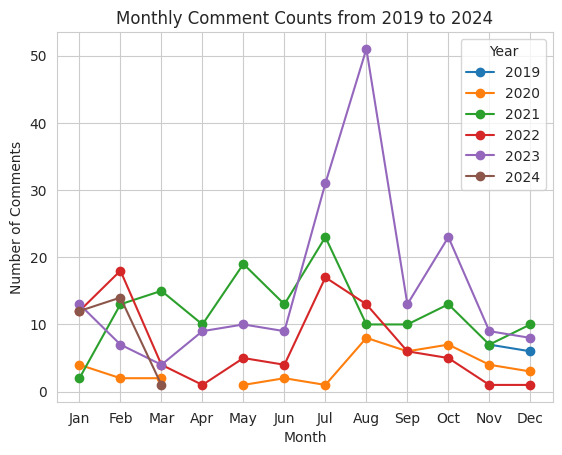

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming that 'data' DataFrame is already defined and includes a 'Date' column

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract year and month from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Filter the data for the years 2019 to 2024
data_filtered = data[(data['Year'] >= 2019) & (data['Year'] <= 2024)]

# Group by 'Year' and 'Month', and then count the comments
monthly_comments = data_filtered.groupby(['Year', 'Month']).size().reset_index(name='CommentCount')

# Pivot the table to have months as rows and years as columns
pivot_table = monthly_comments.pivot(index='Month', columns='Year', values='CommentCount')

# Plot the data
plt.figure(figsize=(14, 12))
pivot_table.plot(kind='line', marker='o')
plt.title('Monthly Comment Counts from 2019 to 2024')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract year and month from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Filter the data for the years 2019 to 2024
data_filtered = data[(data['Year'] >= 2019) & (data['Year'] <= 2024)]

# Group by 'Year' and 'Month', and then count the comments
monthly_comments = data_filtered.groupby(['Year', 'Month']).size().reset_index(name='CommentCount')

# Pivot the table to have months as rows and years as columns
pivot_table = monthly_comments.pivot(index='Month', columns='Year', values='CommentCount').reset_index()

# Melting the pivot table to have a suitable DataFrame for Plotly
pivot_melted = pivot_table.melt(id_vars=['Month'], var_name='Year', value_name='CommentCount')

# Plot the data with Plotly
fig = px.line(pivot_melted, x='Month', y='CommentCount', color='Year', markers=True,
              labels={'Month': 'Month', 'CommentCount': 'Number of Comments'},
              title='Monthly Comment Counts from 2019 to 2024')

# Customize the ticks on the x-axis to show month names instead of numbers
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=month_names)

fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1992: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


# Topic Modeling Positive

In [ ]:
%%capture
!pip install gensim nltk
!pip install swifter

In [ ]:
!pip install gensim nltk pandas

In [ ]:
!pip install lda
!pip install pyLDAvis gensim
!pip install --upgrade gensim pyLDAvis
!pip install --upgrade pip
!pip install gensim pyLDAvis
!pip install pyLDAvis==<version> gensim==<version>
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
!pip install gensim==3.8.3
!pip install --upgrade pyLDAvis==3.3.1
!pip install scikit-learn
!pip install pyLDAvis==3.4.1
!pip install git+https://github.com/bmabey/pyLDAvis.git#egg=pyLDAvis

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install pyLDAvis==<version> gensim==<version>'
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py 

In [ ]:
data_posi = data[data['sentiment_category'] == 'positive']
data_posi.head(5)

,web-scraper-order,web-scraper-start-url,Name,Comment,Date,Rate,cleaned_content,sentiment,sentiment_category,true_sentiment,Year,Month
0,1709488452-1,https://www.trip.com/travel-guide/attraction/s...,Anonymous User,This is a dream world created by light and sha...,2024-02-01,5,dream world created light shadow sea flower bu...,0.7964,positive,positive,2024,2
1,1709488452-2,https://www.trip.com/travel-guide/attraction/s...,紫菜铲铲子,"After the peak period, the traffic is not larg...",2024-01-16,4,peak period traffic large suitable walking bab...,0.5435,positive,positive,2024,1
2,1709488452-3,https://www.trip.com/travel-guide/attraction/s...,nhungvu,Just one word for this place: Awesome!!! It’s ...,2024-01-15,5,one word place awesome deserved visit u shangh...,0.7841,positive,positive,2024,1
3,1709488452-4,https://www.trip.com/travel-guide/attraction/s...,016***97,"Wonderful light and shadow world, dazzling col...",2024-01-13,5,wonderful light shadow world dazzling color be...,0.9231,positive,positive,2024,1
5,1709488452-6,https://www.trip.com/travel-guide/attraction/s...,M30***50,"The hustle and bustle of the city, the quiet p...",2023-11-14,5,hustle bustle city quiet place experience spec...,0.7579,positive,positive,2023,11


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Define stopwords, lemmatizer, and allowed parts of speech
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
allowed_postags = ['NN', 'JJ', 'VB', 'RB']  # Noun, Adjective, Verb, Adverb

def preprocess_data_english(doc_set):
    text_data = []
    for doc in doc_set:
        # Tokenize and remove stopwords
        tokens = word_tokenize(doc.lower())
        stopped_tokens = [i for i in tokens if not i in stop_words]

        # Lemmatize and filter by allowed part-of-speech tags
        lemmatized_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
        tagged_tokens = pos_tag(lemmatized_tokens)
        filtered_tokens = [word for word, tag in tagged_tokens if tag in allowed_postags]

        text_data.append(filtered_tokens)
    return text_data

# Assuming 'data' is your DataFrame and it has a column named 'message' for text
data_posi['processed_data'] = preprocess_data_english(data_posi['cleaned_content'])

# Display the processed data
print(data_posi['processed_data'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [dream, world, light, shadow, sea, flower, but...
1    [peak, period, traffic, large, suitable, walki...
2    [word, place, visit, u, shanghai, highly, reco...
3    [wonderful, light, shadow, world, color, beaut...
5    [hustle, bustle, city, quiet, place, experienc...
Name: processed_data, dtype: object


<ipython-input-18-1e1cc34fd420>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from gensim import corpora

# Assuming `processed_data` is a column in `data_posi` containing lists of tokens
texts = data_posi['processed_data'].tolist()

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(texts)

# Optional: Remove extreme values from the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count).
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# Ensure 'data_posi' is defined and contains the relevant text data
processed_data = preprocess_data_english(data_posi['cleaned_content'])

# Update 'data_posi' with processed data
data_posi['processed_data'] = processed_data

# Create a dictionary representation of the documents
texts = data_posi['processed_data'].tolist()
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Convert document into the bag-of-words format
corpus = [dictionary.doc2bow(text) for text in texts]

<ipython-input-20-9da4522361d6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Assuming the necessary libraries are installed and the previous steps have been completed,
# including creating the `dictionary` and `corpus`.

from gensim.models.ldamodel import LdaModel

# Define the number of topics you want to extract
num_topics = 3

# Set training parameters.
num_passes = 50
random_state = 42

# Create and train the LDA model
lda = LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=num_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=50,
                                            alpha='auto',
                                            per_word_topics=True)

# Display the topics
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.039*"art" + 0.031*"museum" + 0.030*"world" + 0.028*"light" + 0.023*"space"')
(1, '0.051*"tea" + 0.042*"cup" + 0.038*"drink" + 0.037*"staff" + 0.034*"room"')
(2, '0.040*"good" + 0.034*"beautiful" + 0.030*"experience" + 0.029*"worth" + 0.027*"exhibition"')


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score using the c_v measure
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, corpus=corpus, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print('Coherence Score: ', coherence_score)

Coherence Score:  0.45612742825945124


## visualize

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel

# Preparing the visualization data. Note: `gensimvis.prepare` might show a deprecation warning for gensim_models, depending on your pyLDAvis version.
vis_data = gensimvis.prepare(lda, corpus, dictionary)

# Visualizing
pyLDAvis.display(vis_data)


# Topic Modeling Negative

In [ ]:
data_nega = data[data['sentiment_category'] == 'negative']
data_nega.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:73: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:73: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:73: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Catego

,web-scraper-order,web-scraper-start-url,Name,Comment,Date,Rate,cleaned_content,sentiment,sentiment_category,true_sentiment,Year,Month
4,1709488452-5,https://www.trip.com/travel-guide/attraction/s...,BLUEEYES2,"Immerse in the flow of light and shadow, the m...",2024-03-01,5,immerse flow light shadow music moving quiet t...,-0.2716,negative,positive,2024,3
38,1709488452-39,https://www.trip.com/travel-guide/attraction/s...,娃娃姐,"Very shocking, feel high-tech",2024-02-13,5,shocking feel hightech,-0.4019,negative,positive,2024,2
42,1709488452-43,https://www.trip.com/travel-guide/attraction/s...,卡比寿寿,Not bad! Really,2024-02-26,5,bad really,-0.5423,negative,positive,2024,2
49,1709488452-50,https://www.trip.com/travel-guide/attraction/s...,Anonymous User,"It's a worthwhile trip, it's really shocking",2023-07-26,5,worthwhile trip really shocking,-0.1513,negative,positive,2023,7
53,1709488452-54,https://www.trip.com/travel-guide/attraction/s...,Anonymous User,I thought it was just one floor but i was tota...,2024-02-26,5,thought one floor totally wrong make sure expl...,-0.2094,negative,positive,2024,2


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Define stopwords, lemmatizer, and allowed parts of speech
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
allowed_postags = ['NN', 'JJ', 'VB', 'RB']  # Noun, Adjective, Verb, Adverb

def preprocess_data_english(doc_set):
    text_data = []
    for doc in doc_set:
        # Tokenize and remove stopwords
        tokens = word_tokenize(doc.lower())
        stopped_tokens = [i for i in tokens if not i in stop_words]

        # Lemmatize and filter by allowed part-of-speech tags
        lemmatized_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
        tagged_tokens = pos_tag(lemmatized_tokens)
        filtered_tokens = [word for word, tag in tagged_tokens if tag in allowed_postags]

        text_data.append(filtered_tokens)
    return text_data

# Assuming 'data' is your DataFrame and it has a column named 'message' for text
data_nega['processed_data'] = preprocess_data_english(data_nega['cleaned_content'])

# Display the processed data
print(data_nega['processed_data'].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


4     [immerse, flow, shadow, music, quiet, time, pa...
38                                     [feel, hightech]
42                                        [bad, really]
49                           [worthwhile, trip, really]
53         [floor, totally, wrong, sure, explore, area]
Name: processed_data, dtype: object


<ipython-input-25-adae02ae5e2b>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from gensim import corpora

# Assuming `processed_data` is a column in `data_posi` containing lists of tokens
texts_nega = data_nega['processed_data'].tolist()

# Create a dictionary representation of the documents.
dictionary_nega = corpora.Dictionary(texts_nega)

# Optional: Remove extreme values from the dictionary
dictionary_nega.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count).
corpus_nega = [dictionary_nega.doc2bow(text) for text in texts_nega]

processed_data = preprocess_data_english(data_nega['cleaned_content'])

data_nega['processed_data'] = processed_data

texts_nega = data_nega['processed_data'].tolist()
dictionary_nega = corpora.Dictionary(texts_nega)
dictionary_nega.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

corpus_nega = [dictionary_nega.doc2bow(text) for text in texts_nega]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-26-07c7df602ade>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from gensim.models.ldamodel import LdaModel

# Define the number of topics you want to extract
num_topics_nega = 3

# Set training parameters.
num_passes = 10
random_state = 42

# Create and train the LDA model
lda_nega = LdaModel(corpus=corpus_nega,
                                            id2word=dictionary_nega,
                                            num_topics=num_topics_nega,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# Display the topics
topics = lda_nega.print_topics(num_words=3)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(0, '0.375*"exhibition" + 0.273*"hall" + 0.179*"art"')
(1, '0.357*"worth" + 0.299*"bad" + 0.180*"art"')
(2, '0.360*"child" + 0.306*"light" + 0.260*"take"')


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score using the c_v measure
coherence_model_lda_nega = CoherenceModel(model=lda_nega, texts=texts, dictionary=dictionary_nega, corpus=corpus_nega, coherence='c_v')
coherence_score_nega = coherence_model_lda_nega.get_coherence()

print('Coherence Score: ', coherence_score_nega)

Coherence Score:  0.3724173776680501


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## visualize

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel

# Assuming `lda` is your trained LdaModel, `corpus` is your Gensim corpus, and `dictionary` is your Gensim dictionary

# Prepare the visualization data
vis_data_nega = gensimvis.prepare(lda_nega, corpus_nega, dictionary_nega)

# Visualize
pyLDAvis.display(vis_data_nega)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Topic Modeling Neutral

In [ ]:
data_neural = data[data['sentiment_category'] == 'neutral']
data_neural.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:73: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:73: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:73: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Catego

,web-scraper-order,web-scraper-start-url,Name,Comment,Date,Rate,cleaned_content,sentiment,sentiment_category,true_sentiment,Year,Month
18,1709488452-19,https://www.trip.com/travel-guide/attraction/s...,花落缤纷2008,"Basically two hours can be finished, take the ...",2024-02-11,5,basically two hour finished take child see sti...,0.000,neutral,positive,2024,2
21,1709488452-22,https://www.trip.com/travel-guide/attraction/s...,M34***27,"As an exhibition hall in Shanghai, it is still...",2023-08-07,5,exhibition hall shanghai still goodlooking lat...,0.000,neutral,positive,2023,8
28,1709488452-29,https://www.trip.com/travel-guide/attraction/s...,M25***03,I knew this show in Macau. I didn’t go because...,2023-10-23,5,knew show macau didnt go time thought shanghai...,-0.024,neutral,positive,2023,10
65,1709488452-66,https://www.trip.com/travel-guide/attraction/s...,莎莎妮妮妮,"In the former Shanghai Expo Park, it faces the...",2023-08-10,5,former shanghai expo park face hongkou river s...,0.000,neutral,positive,2023,8
66,1709488452-67,https://www.trip.com/travel-guide/attraction/s...,濱崎步,Enter Ayu's MASK MV!,2023-11-13,5,enter ayus mask mv,0.000,neutral,positive,2023,11


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Define stopwords, lemmatizer, and allowed parts of speech
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
allowed_postags = ['NN', 'JJ', 'VB', 'RB']  # Noun, Adjective, Verb, Adverb

def preprocess_data_english(doc_set):
    text_data = []
    for doc in doc_set:
        # Tokenize and remove stopwords
        tokens = word_tokenize(doc.lower())
        stopped_tokens = [i for i in tokens if not i in stop_words]

        # Lemmatize and filter by allowed part-of-speech tags
        lemmatized_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
        tagged_tokens = pos_tag(lemmatized_tokens)
        filtered_tokens = [word for word, tag in tagged_tokens if tag in allowed_postags]

        text_data.append(filtered_tokens)
    return text_data

# Assuming 'data' is your DataFrame and it has a column named 'message' for text
data_neural['processed_data'] = preprocess_data_english(data_neural['cleaned_content'])

# Display the processed data
print(data_neural['processed_data'].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


18    [basically, hour, take, child, still, possible...
21    [exhibition, hall, shanghai, still, later, tem...
28    [knew, show, macau, didnt, time, thought, shan...
65    [former, shanghai, expo, park, face, river, st...
66                              [enter, ayus, mask, mv]
Name: processed_data, dtype: object


<ipython-input-31-806633f0c5f2>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from gensim import corpora

# Assuming `processed_data` is a column in `data_posi` containing lists of tokens
texts_neu = data_neural['processed_data'].tolist()

# Create a dictionary representation of the documents.
dictionary_neu = corpora.Dictionary(texts_neu)

# Optional: Remove extreme values from the dictionary
dictionary_neu.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count).
corpus_neu = [dictionary_neu.doc2bow(text) for text in texts_neu]

processed_data = preprocess_data_english(data_neural['cleaned_content'])

data_neural['processed_data'] = processed_data

texts_neu = data_neural['processed_data'].tolist()
dictionary_neu = corpora.Dictionary(texts_neu)
dictionary_neu.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

corpus_neu = [dictionary_neu.doc2bow(text) for text in texts_neu]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-32-f5e5e74bd633>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from gensim.models.ldamodel import LdaModel

# Define the number of topics you want to extract
num_topics_neu = 3

# Set training parameters.
num_passes = 10
random_state = 42

# Create and train the LDA model
lda_neu = LdaModel(corpus=corpus_neu,
                                            id2word=dictionary_neu,
                                            num_topics=num_topics_neu,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# Display the topics
topics = lda_neu.print_topics(num_words=3)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(0, '0.896*"exhibition" + 0.054*"experience" + 0.050*"place"')
(1, '0.844*"place" + 0.085*"experience" + 0.072*"exhibition"')
(2, '0.893*"experience" + 0.055*"exhibition" + 0.052*"place"')


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score using the c_v measure
coherence_model_lda_neu = CoherenceModel(model=lda_neu, texts=texts, dictionary=dictionary_neu, corpus=corpus_neu, coherence='c_v')
coherence_score_neu = coherence_model_lda_neu.get_coherence()

print('Coherence Score: ', coherence_score_neu)

Coherence Score:  0.6157243088833213


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## visualize

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel

# Assuming `lda` is your trained LdaModel, `corpus` is your Gensim corpus, and `dictionary` is your Gensim dictionary

# Prepare the visualization data
vis_data_neu = gensimvis.prepare(lda_neu, corpus_neu, dictionary_neu)

# Visualize
pyLDAvis.display(vis_data_neu)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Since the customer journey typically includes qualitative data about customer experiences,
# let's try to extract relevant information from the reviews and other textual data provided in the dataset.

# We'll examine the 'Comment' column to derive insights for each stage of the customer journey.

# Define the stages of a customer journey
stages = {
    'Discovery': [],  # where customers learn about the service
    'Arrival': [],    # the customer's first impression upon arrival
    'Reservation': [], # the process of making a reservation
    'Dining Experience': [], # the actual experience of the service
    'Payment': [], # the checkout or payment experience
    'Post-Visit': [] # the follow-up and lasting impression
}

# Loop through the DataFrame and collect comments that could be relevant for each stage
for index, row in data.iterrows():
    # Assuming the 'Comment' column contains text data for the customer journey
    comment = str(row['Comment']).lower()
    if "discovery" in comment or "find" in comment or "search" in comment or "website" in comment:
        stages['Discovery'].append(comment)
    if "arrival" in comment or "enter" in comment or "first" in comment or "welcome" in comment:
        stages['Arrival'].append(comment)
    if "book" in comment or "reserve" in comment or "order" in comment:
        stages['Reservation'].append(comment)
    if "dine" in comment or "eat" in comment or "taste" in comment or "menu" in comment:
        stages['Dining Experience'].append(comment)
    if "pay" in comment or "checkout" in comment or "bill" in comment:
        stages['Payment'].append(comment)
    if "return" in comment or "again" in comment or "next time" in comment:
        stages['Post-Visit'].append(comment)

# For a simple example, let's just print out the first comment we find for each stage.
for stage, comments in stages.items():
    print(f"{stage}: {comments[0] if comments else 'No comment available'}\n")



Discovery: the number one gallery does have something, like a feast of lighting and technology. one is that children at the exit can color a pair of marine life, and the finished product can be dynamically projected onto the wall, and then swim around, which is more interesting. in addition, lighting and various shapes are a visual feast for individuals. there is a small problem. there are some dark pavilions that are blocked by a curtain. because it is dark, it is not even possible to find the entrance and exit. sometimes when you enter, the staff will tell you that this is an exit. the entrance must be entered from elsewhere. why can't the staff guide outside the curtain?

Arrival: teamlab produces consistent quality, experience and creativity first class. unlike the planets in tokyo, the free space makes people linger. when you are tired, you will drink tea in the teahouse and watch the flowers bloom slowly.

Reservation: very good experience, convenient and convenient booking, real

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

